Perform one sample Bayesian t-test on some toy data.
Code is from


https://github.com/bambinos/bambi/blob/main/docs/notebooks/t-test.ipynb


In [1]:
try:
    from probml_utils import savefig, latexify
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify

In [9]:
import os

# For making figures in the book
# os.environ["FIG_DIR"] = "/Users/kpmurphy/github/bookv2/figures"
# os.environ["LATEXIFY"] = "1"
# latexify(fig_height=1.5)

/opt/anaconda3/lib/python3.8/site-packages/probml_utils/plotting.py:25: UserWarning: LATEXIFY environment variable not set, not latexifying
  warnings.warn("LATEXIFY environment variable not set, not latexifying")


In [2]:

try:
    import bambi
except ModuleNotFoundError:
    %pip uninstall -y numba numpy resampy librosa kapre # hack for public colab (h/t Ravin Kumar)
    %pip install git+https://github.com/bambinos/bambi.git
    #%pip install bambi
    import bambi

WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [26]:
import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
az.style.use("arviz-darkgrid")
np.random.seed(1234)

In [6]:
a = np.random.normal(6, 2.5, 160)
b = np.random.normal(8, 2, 120)
df = pd.DataFrame({"Group": ["a"] * 160 + ["b"] * 120, "Val": np.hstack([a, b])})

df.head()

,Group,Val
0,a,4.773791
1,a,5.063908
2,a,0.006240
3,a,9.852575
4,a,6.157711


/opt/anaconda3/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/violinplot.py:64: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(wspace=0)


saving image to /Users/kpmurphy/github/bookv2/figures/ttest_bambi_violin.pdf
Figure size: [13.8  4.6]


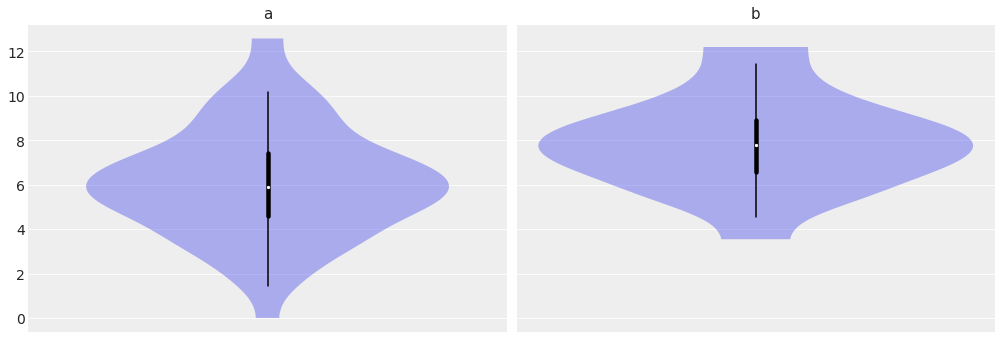

In [11]:
az.plot_violin({"a": a, "b": b})
savefig("ttest_bambi_violin")

In [25]:
ndx = df["Group"] == "a"
data_a = df[ndx]["Val"]
data_a

0       4.773791
1       5.063908
2       0.006240
3       9.852575
4       6.157711
         ...    
155     9.893494
156     4.516609
157     5.574279
158    10.181567
159     4.648000
Name: Val, Length: 160, dtype: float64

saving image to /Users/kpmurphy/github/bookv2/figures/ttest_bambi_boxplot.pdf
Figure size: [6. 4.]


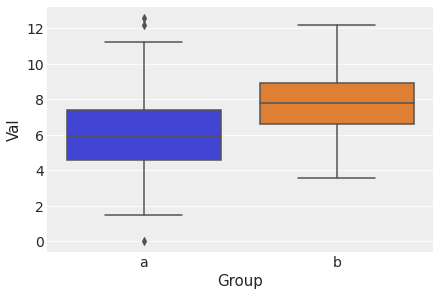

In [28]:
sns.boxplot(y="Val", x="Group", data=df)
savefig("ttest_bambi_boxplot")
plt.show()

In [12]:
# We fit a model with no intercept (by specifying 0 in the formula)
# Thus  beta[g] corresponds to group g for g in {A,B}

model_2 = bmb.Model("Val ~ 0 + Group", df)
results_2 = model_2.fit()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Group, Val_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 57 seconds.


In [13]:
model_2

Formula: Val ~ 0 + Group
Family name: Gaussian
Link: identity
Observations: 280
Priors:
  Common-level effects
    Group ~ Normal(mu: [0. 0.], sigma: [11.6292 11.6292])

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 2.302)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()

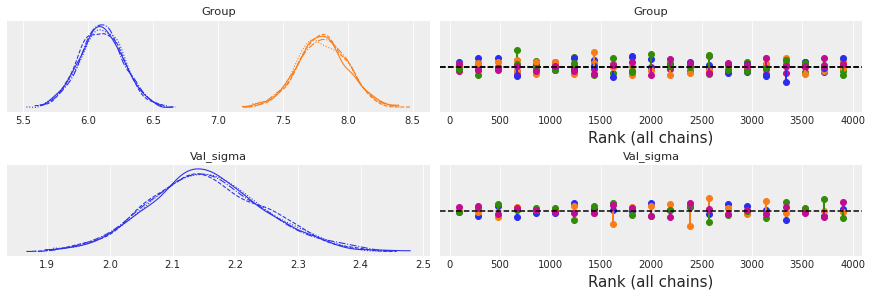

In [14]:
az.plot_trace(results_2, kind="rank_vlines");

saving image to /Users/kpmurphy/github/bookv2/figures/ttest_bambi_post_diff.pdf
Figure size: [6. 4.]


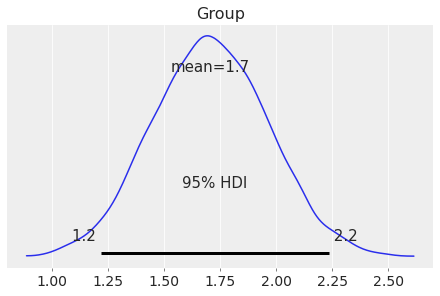

In [19]:
post_group = results_2.posterior["Group"]
diff = post_group.sel(Group_dim="b") - post_group.sel(Group_dim="a")
az.plot_posterior(diff, hdi_prob=0.95)
savefig("ttest_bambi_post_diff")

saving image to /Users/kpmurphy/github/bookv2/figures/ttest_bambi_post_a.pdf
Figure size: [6. 4.]
saving image to /Users/kpmurphy/github/bookv2/figures/ttest_bambi_post_b.pdf
Figure size: [6. 4.]


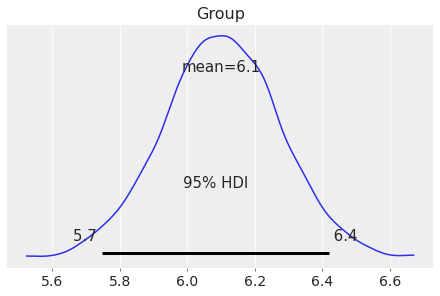

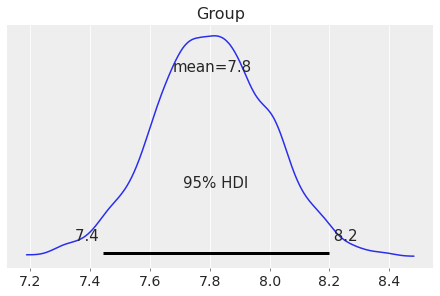

In [20]:
post_group = results_2.posterior["Group"]
az.plot_posterior(post_group.sel(Group_dim="a"), hdi_prob=0.95)
savefig("ttest_bambi_post_a")

az.plot_posterior(post_group.sel(Group_dim="b"), hdi_prob=0.95)
savefig("ttest_bambi_post_b")